In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


***Son un tipo distinto de Redes Neuronales donde sus parámetros aprenden “feature maps” de los datos. Principalemente se aplican en imágenes, pero pueden aplicarse para secuencias unidimensionales o secuencias de imágenes (videos).***

Deep learning methods based on convolutional neural networks (CNNs) are a class of architectures commonly used for spatial pattern analysis. CNNs receive an input image that is passed through a series of convolutional layers, and a vector of image features is generated. The generated vector is typically connected to a fully connected network whose output can be a sigmoid, softmax, linear, and other functions depending on the problem being solved

[Dot CSV](https://www.youtube.com/watch?v=V8j1oENVz00 )


The figure shows the architecture of a CNN with its main components, in an example of classifying the presence of pine trees using RGB images captured by drones: (a) Input Image, (b) Convolutional Layers, (c) Pooling Layers, (d) Fully Connected Layers, and (e) Output Layers.

![Descripción de la imagen](https://drive.google.com/uc?export=view&id=1MFBeIw2KOHqMXkCpqzvsRRnToe9f9ncp)


**Input Layer**: Receives as input an image, typically represented in three dimensions: height, width, and color channels (Figure.a).

**Convolutional Layers**: Apply multiple small filters to the input image. Each filter is slid over the image by performing a convolution operation to produce a feature map. A nonlinear activation function, typically ReLU (Rectified Linear Unit), is applied to these maps to introduce nonlinearities and allow the network to learn complex relationships (Figure.b).

**Pooling layers**: They reduce the dimensions of the feature maps. This can be done by max pooling, which takes the maximum value, or average pooling, which takes the average the values (Figure.c).

**Fully Connected Layers**: these layers are divided into two types: flattening layers, which convert feature maps into one-dimensional vectors, and dense layers, which connect each neuron in one layer with each neuron in the next layer. Activation functions such as ReLU, linear, and sigmoid, among others, are used in these layers (Figure.d).

**Output Layer:** It is the last layer and the one that delivers the predictions, and can vary according to the task. For example, for a multiclass classification, a softmax function is generally used to produce the probability of each class; for binary classification, a sigmoid function is usual; for a regression problem, a linear or sigmoid function is common, among other examples (Figure.e).



**Hiperparámetros de la Convolución:**

*Stride:* Corresponde a la cantidad de pasos en que se mueve el Kernel. Un stride más grande implica feature maps más pequeños y menos detalles. Strides más pequeños retiene más detalles, pero implica un mayor número de operaciones.

*Padding:* Corresponde a un relleno para dar mayor movimiento del kernel. Permite evitar la reducción de dimensionalidad por parte de la convolución además de considerar la información de los bordes de la imagen. Se llama “valid” a no usar padding, y “same” a agregar suficientes píxeles para evitar la reducción de dimensión.

*Dilation:* En este caso se tienen gaps al momento de aplicar el Kernel. Normalmente aplicar dilation aumenta el campo receptivo de la convolución capturando más contexto sin la necesidad de aumentar el kernel size. 1 implica sin dilation.

Original (10, 10)
Resultado de la Convolución (10, 10)


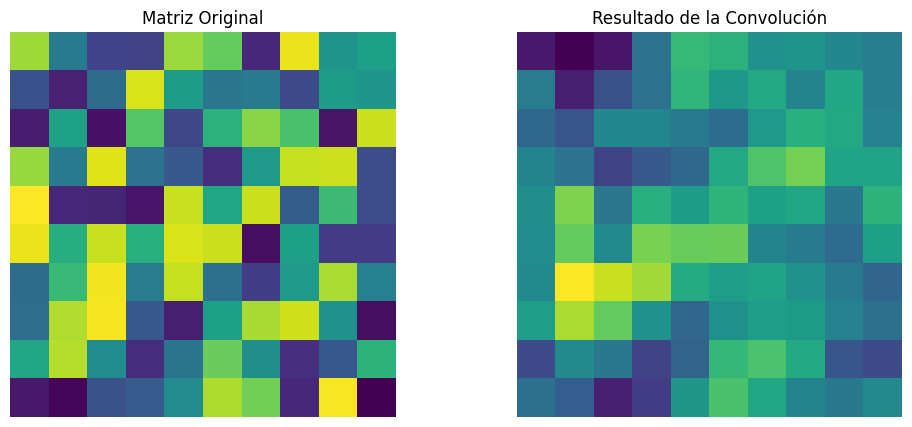

In [ ]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

# Crear una matriz 10x10 con valores aleatorios entre 0 y 1
matriz = np.random.rand(10, 10)

# Crear un kernel 3x3 de suavizado
kernel = np.ones((3, 3)) / 9

# Aplicar la convolución
#mode=full,valid,same
#boundary=A flag indicating how to handle boundaries (fill,value,wrap,symm)
#fillvalue= value to fill pad input arrays with. Default is 0.
resultado = convolve2d(matriz, kernel, mode='same', boundary='wrap', fillvalue=0)

# Visualizar la matriz original y el resultado de la convolución como mapas de calor
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Mapa de calor de la matriz original
axes[0].imshow(matriz, cmap='viridis')
axes[0].set_title('Matriz Original')
axes[0].axis('off')  # Ocultar ejes

# Mapa de calor del resultado de la convolución
axes[1].imshow(resultado, cmap='viridis')
axes[1].set_title('Resultado de la Convolución')
axes[1].axis('off')  # Ocultar ejes

print("Original",matriz.shape)
print("Resultado de la Convolución",resultado.shape)

plt.show()

Original (10, 10)
Resultado de la Convolución (10, 10)
Resultado de Max Pooling de 2x2 (5, 5)


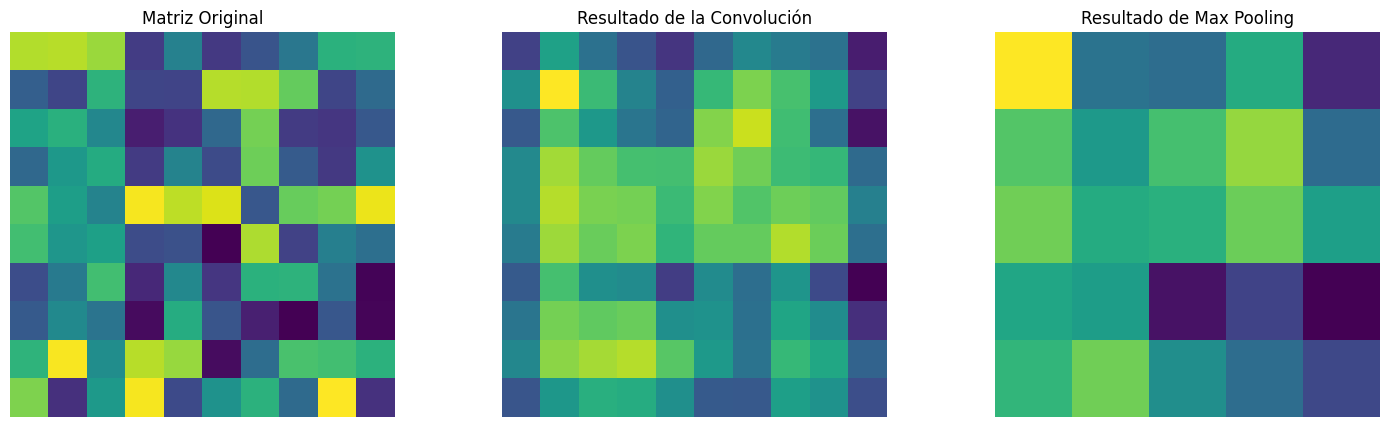

In [ ]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Crear una matriz 10x10 con valores aleatorios entre 0 y 1
matriz = np.random.rand(10, 10)

# Crear un kernel 3x3
kernel = np.ones((3, 3)) / 9

# Aplicar la convolución
resultado_convolucion = convolve2d(matriz, kernel, mode='same', boundary='fill', fillvalue=0)

# Función para aplicar max pooling
def max_pooling(matrix, pool_size):
    # Obtener las dimensiones de la matriz
    n_rows, n_cols = matrix.shape
    pool_rows, pool_cols = pool_size

    # Calcular las dimensiones de la matriz de salida
    out_rows = n_rows // pool_rows
    out_cols = n_cols // pool_cols

    # Redimensionar y aplicar max
    return matrix.reshape(out_rows, pool_rows, out_cols, pool_cols).max(axis=(1, 3))

# Aplicar max pooling de 2x2 al resultado de la convolución
resultado_pooling = max_pooling(resultado_convolucion, pool_size=(2, 2))

# Visualizar la matriz original, el resultado de la convolución y el resultado de max pooling
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mapa de calor de la matriz original
axes[0].imshow(matriz, cmap='viridis')
axes[0].set_title('Matriz Original')
axes[0].axis('off')  # Ocultar ejes

# Mapa de calor del resultado de la convolución
axes[1].imshow(resultado_convolucion, cmap='viridis')
axes[1].set_title('Resultado de la Convolución')
axes[1].axis('off')  # Ocultar ejes

# Mapa de calor del resultado de max pooling
axes[2].imshow(resultado_pooling, cmap='viridis')
axes[2].set_title('Resultado de Max Pooling')
axes[2].axis('off')  # Ocultar ejes

print("Original",matriz.shape)
print("Resultado de la Convolución",resultado.shape)
print("Resultado de Max Pooling de 2x2",resultado_pooling.shape)

plt.show()


**Different approaches to using CNN**

CNN architectures can be used for *different tasks or approaches*, depending on the problem to be solved and the type of labeled data. One of the most common approaches is classification (Figure.a), which corresponds to assigning a class to an entire image. Another approach is object detection (Figure.b), which aims to locate the class individually within an image, usually using a box to frame the target species. On the other hand, there are the semantic and instance segmentation approaches (Figure.c and d), which aim to delineate the explicit spatial extent of the target class and to individually localize the class in the image, respectively. Finally, the image regression approach (Figure.e) assigns a continuous value to the image for a given class.


![Descripción de la imagen](https://drive.google.com/uc?export=view&id=1_GWFDEQHz8uuSQJ14FG2dVW1TTzIooTt)


**VGG16**

La VGG16 es una arquitectura de red neuronal convolucional (CNN) desarrollada por el Visual Geometry Group (VGG) de la Universidad de Oxford. Es conocida por su simplicidad y alto rendimiento en tareas de clasificación de imágenes.

Características principales:

**16 capas profundas:** de ahí su nombre, VGG16 tiene 16 capas con pesos entrenables (13 convolucionales y 3 de red totalmente conectada).
**Filtros pequeños:** usa filtros de tamaño 3x3 en sus capas convolucionales, lo que permite capturar detalles y patrones en diferentes escalas.
**Arquitectura secuencial:** sigue un diseño simple y repetitivo, con bloques de capas convolucionales seguidas de una capa de pooling (reducción de dimensionalidad) después de cada bloque.

![Descripción de la imagen](https://drive.google.com/uc?export=view&id=167YiD4u4KQ52oZ135DwS_Oif6pIVL0Nb)




**U-net**

La U-Net es una arquitectura de red neuronal convolucional diseñada principalmente para tareas de segmentación de imágenes, como en el análisis médico y la visión por computadora.

Características principales:

**Estructura en forma de "U":** La arquitectura tiene una forma simétrica que consiste en dos partes: un encoder (contracción) que captura el contexto de la imagen y un decoder (expansión) que reconstruye la segmentación con precisión.

**Conexiones de salto (skip connections):** Enlazan las capas de la fase de contracción con las capas correspondientes en la fase de expansión. Esto permite recuperar detalles espaciales perdidos durante la reducción de dimensionalidad en el encoder, mejorando la precisión.

**Capas convolucionales:** Utiliza bloques de convoluciones y pooling para reducir la dimensionalidad en el encoder y convoluciones de upsampling para restaurarla en el decoder.

![Descripción de la imagen](https://drive.google.com/uc?export=view&id=1XFmmWslcVIqSH2mVcimsG05qz6_VGiYB)

**YOLO**

YOLO (You Only Look Once) es una arquitectura de red neuronal para detección de objetos en tiempo real. A diferencia de otros enfoques que procesan una imagen varias veces para detectar objetos, YOLO realiza todas las detecciones en una sola pasada, lo que lo hace extremadamente rápido y eficiente.

Características principales:

**Detección en una sola etapa:** YOLO divide la imagen en una cuadrícula y predice simultáneamente las probabilidades de clase y las cajas delimitadoras (bounding boxes) para múltiples objetos.

**Precisión y velocidad:** Debido a su diseño, YOLO es capaz de realizar detección en tiempo real con buena precisión, especialmente útil en aplicaciones de video o sistemas embebidos.

**Versiones avanzadas:** Cada nueva versión (como YOLOv3, YOLOv4, y YOLOv5) ha mejorado en precisión, detección de objetos pequeños y manejo de múltiples clases.

![Descripción de la imagen](https://drive.google.com/uc?export=view&id=1KELPc0DdWOESVEK6FKrcprwSKzWKVvCT)